<a href="https://colab.research.google.com/github/davialvesguerra/trainee-iee/blob/main/3%C2%BA_Per%C3%ADodo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
df = pd.read_csv('gdrive/My Drive/iee/3º Período/winequality.csv')

In [4]:
df

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_is_red
0,0,5.9,0.61,0.08,2.1,0.071,16.0,24.0,0.99376,3.56,0.77,11.1,6,1
1,1,8.2,1.00,0.09,2.3,0.065,7.0,37.0,0.99685,3.32,0.55,9.0,6,1
2,2,6.4,0.24,0.49,5.8,0.053,25.0,120.0,0.99420,3.01,0.98,10.5,6,0
3,3,6.6,0.23,0.26,1.3,0.045,16.0,128.0,0.99340,3.36,0.60,10.0,6,0
4,4,7.2,0.24,0.29,3.0,0.036,17.0,117.0,0.99411,3.36,0.68,10.1,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6492,7.7,0.32,0.62,10.6,0.036,56.0,153.0,0.99780,3.13,0.44,8.9,6,0
6493,6493,6.2,0.22,0.28,2.2,0.040,24.0,125.0,0.99170,3.19,0.48,10.5,6,0
6494,6494,7.9,0.33,0.28,31.6,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6,0
6495,6495,7.0,0.30,0.28,2.2,0.042,21.0,177.0,0.99166,3.20,0.57,11.4,5,0


In [5]:
def knn(X_test: "np.array", X_train, y_train, k):
  
  #número de linhas que a matriz de valores explicativos possa ter
  nrow = X_test.shape[0]
  #reservando um vetor de tamanho nrow para os valores da variável resposta
  y_pred = np.empty(nrow)

  for i in range(nrow):

    #capturando a i-ésima linha das variáveis explicativas
    x_test = X_test[i,:]

    #índice dos X treino
    ind = X_train.index
    #diferença do Xi para cada linha do X_treino
    X_process = X_train - x_test
    #elevando os valores ao quadrado
    X_process = X_process**2

    #fazendo a soma de todos os valores de cada variável e tirando a raiz quadrada para pegar a distância euclidiana de cada observação Xi
    X_process = np.sqrt(np.sum(X_process, axis=1))

    #realocando o resultado da distância com o respectivo índice das variáveis explicativas 
    result = np.column_stack([ind,X_process])

    #reordenando do menor para o maior
    result = result[result[:,1].argsort()]

    #pegando os k primeiros resultados
    result = y_train[result[:k,0]]

    #pegando a observação que mais apareceu
    y_pred[i] = np.argmax(np.bincount(result))
    
  return y_pred


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Relatório


### Classificação binária para prever se o vinho é tinto ou não;

In [7]:
X = df.iloc[:,[1,2,3,4,5,6,7,8,9,10,11]]
y = df.iloc[:,13]

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [9]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [12]:
model = PCA()

pca_features = model.fit_transform(X)
variancia_raio = model.explained_variance_ratio_

total_vars = len(variancia_raio)
nivel_signif = 1 - 0.05

reduc_vars = list(filter(lambda x: sum(variancia_raio[0:x]) > nivel_signif, range(total_vars)))
total_reduc_vars = total_vars - len(reduc_vars)
print(f"Total de variáveis:\n{total_vars}.\nTotal de variáveis depois de aplicar um nível de significância de {round(1-nivel_signif,2)}:\n{total_reduc_vars}.")


Total de variáveis:
11.
Total de variáveis depois de aplicar um nível de significância de 0.05:
9.


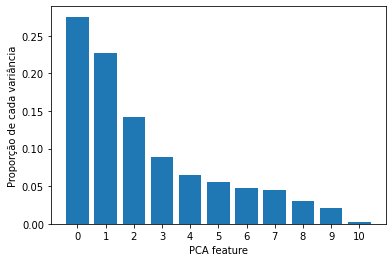

In [13]:
features = range(model.n_components_)
plt.bar(features, model.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('Proporção de cada variância')
plt.xticks(features)
plt.show()

utilizando os resultados da pca, vamos utilizar 9 variáveis ao invés de 11, assim reduzindo um pouco o custo computacional, na medida que eu perco 0.05 de informação das minhas variáveis.

In [15]:
X = df.iloc[:,[1,2,3,4,5,6,7,8,9,10,11]]

pca = PCA(n_components=9)
scaler = StandardScaler()

X = scaler.fit_transform(X)
X = pca.fit_transform(X)

In [16]:
#usando um k = 3, vamos classificar se o vinho é tinto ou não
k = 3
X = pd.DataFrame(X)
y = df.iloc[:,13]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_test = X_test.to_numpy() 

start_time = time.time()
y_pred = knn(X_test, X_train, y_train, k=k)
end_time = time.time()

print(end_time - start_time)
conf_matrix = confusion_matrix(y_pred, y_test)

7.8945372104644775


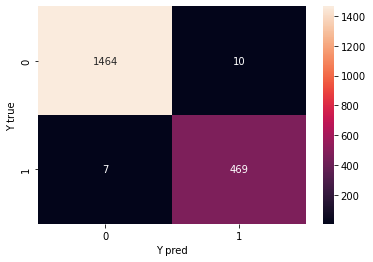

In [17]:
ax = sns.heatmap(conf_matrix, annot=True,  fmt='g')
ax.set(xlabel='Y pred', ylabel='Y true')
plt.show()

In [25]:
from sklearn.metrics import accuracy_score
accr = round(accuracy_score(y_test, y_pred),3)

print(f'Utilizando o método knn, com k = {k}, temos que a acurácia é de: {accr}')

Utilizando o método knn, com k = 3, temos que a acurácia é de: 0.551


### Classificação multiclasse para prever a qualidade do vinho;

In [20]:
X = df.iloc[:,[1,2,3,4,5,6,7,8,9,10,11]]

pca = PCA(n_components=9)
scaler = StandardScaler()

X = scaler.fit_transform(X)
X = pca.fit_transform(X)

In [21]:
y = df.iloc[:,12]
k = 3

X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_test = X_test.to_numpy() 

start_time = time.time()
y_pred = knn(X_test, X_train, y_train, k=k)
end_time = time.time()

end_time - start_time

conf_matrix = confusion_matrix(y_pred, y_test)

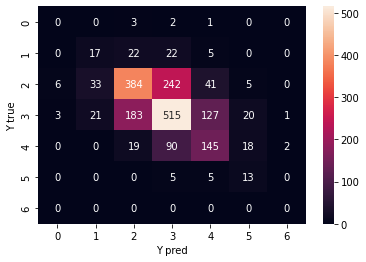

In [26]:
ax = sns.heatmap(conf_matrix, annot=True,  fmt='g')
ax.set(xlabel='Y pred', ylabel='Y true')
plt.show()

In [24]:
accr = round(accuracy_score(y_test, y_pred),3)

print(f'Utilizando o método knn, com k = {k}, temos que a acurácia é de: {accr}')

Utilizando o método knn, com k = 3, temos que a acurácia é de: 0.551
